# Intro to Deep Learning with Keras

This Jupyter notebook contains code and explanations for the 2018 AIS Intro to Deep Learning workshop. This tutorial focuses on training neural networks to recognize handwritten digits using the MNIST dataset.

## How to Use This Notebook
This notebook has several cells, some with markdown and others with runnable Python code. To run a cell, click on the cell and then use the **SHIFT + ENTER** keyboard shortcut or navigate to **Cell** in the top menu bar and click on **Run Cells** in the dropdown menu.

## Software Prerequisites
Make sure to install the following software/libraries:

- **Anaconda** - Python distribution with many useful libraries
- **TensorFlow** - deep learning library, acts as a backend for Keras
- **Keras** - a high-level deep learning library that runs on top of TensorFlow

## Libraries Used

- **Numpy** - for handling linear algebra and numerical computations in machine learning.
- **Matplotlib** - for visualizing data, such as images.
- **Keras** - features a simple API for deep learning.

## About the MNIST Dataset - Recognizing Handwritten Digits
The goal of this exercise is to train a neural network to recognize handwritten digits using the famous MNIST dataset. The MNIST dataset contains a training set with 60,000 labeled 28 x 28 pixel images of the 10 digits and a test set with 10,000 images. 

## Importing Numpy and Matplotlib

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Reading in the Data
The MNIST dataset is so popular that we can download it using Keras!

In [2]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

//anaconda/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
//anaconda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


The code above downloaded the following four parts of the dataset:
- **X_train** - the training images, which consist of 60,000 grayscale images represented as matrices with values corresponding to the darkness of each pixel.
- **y_train** - the training labels, which consist of 60,000 digits ranging from 0 to 9.
- **X_test** - the test images, which consist of 10,000 grayscale images represented as matrices.
- **y_test** - the test labels, which consist of 10,000 digits ranging from 0 to 9.

Let's take a look at the shapes of these four parts of our data, which are all represented as numpy arrays.

In [3]:
print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('X_test shape: {}'.format(X_test.shape))
print('y_test shape: {}'.format(y_test.shape))

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


Our training image set is basically a 3D stack of 60,000 28 x 28 pixel images and similarly, our test image set is a stack of 10,000 images of the same shape.

In [4]:
X_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

All we see in the output above is a matrix with a lot of zeros, but we can use **matplotlib** to see what this matrix really looks like as an image.

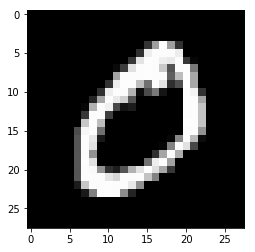

In [5]:
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))  # the cmap argument allows us to view this as a grayscale image

Based on the visualization above we as humans, can clearly see that this is the number 0. We can take a look at the label as well to check that the image is labeled correctly.

In [6]:
y_train[1]

0

Let's do the same for another image.

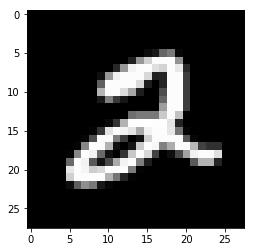

In [7]:
plt.imshow(X_train[5], cmap=plt.get_cmap('gray'))

In [8]:
y_train[5]

2

## What is Deep Learning? What are Neural Networks?
Deep learning is a subfield of machine learning focused on using biologically-inspired models known as **neural networks** to solve a wide range of machine learning problems. At a high-level, neural networks are basically **mathematical models** that are based roughly on neurological concepts in **human learning**. 

## The Three Key Components of Neural Networks
Neural networks can be a slightly challenging concept to grasp since they involve a mix of ideas from math, computer science, and even neuroscience. There is a lot of technical information in this workshop, so I would recommend focusing on gaining a high-level understanding of **three fundamental components** of neural networks:

1. **Structure** - what the neural network looks like, including all the mathematical functions involved, the number of inputs and outputs, and the parameters, called **weights** that the network has to learn.
    
2. **Loss Function** - a metric that tells us how good or bad the network's predictions are. 
3. **Optimizer** - the algorithm used for **learning the weights** that give the network the best predictions.


## Structure of Neural Networks - A Biology and Math Lesson
As we mentioned before neural networks are **biologically inspired** models. For a moment, let's forget about machine learning and review how the human nervous system works to understand where the concept of neural networks came from. A **neuron**, the fundamental unit of this system, looks something like this:

<img src='./images/neuron.png', width=400px, height=200px>
(image source: http://home.agh.edu.pl/~vlsi/AI/intro/)

### Key Parts of the Neuron
A neuron transmits electrical signals that are constantly activated as the human brain learns and recognizes new concepts. The main parts of a neuron that we should take note of are:

- **inputs** - the neuron receives several input signals through **dendrites** from connections to neighboring neurons. 
- **synapses** - gaps between **axons** and **dendrites**. Synapses transfer signals between neurons.
- **body** - the neuron has a cell body that receives all of the incoming signals.
- **axon** - a long connection that transmits an electrical signal **output**.
- **activation threshold** - neurons fire when electrical activity exceeds a certain threshold.


### The Simplest Neural Network - The Perceptron
The perceptron, arguably the simplest neural network, was invented by psychologist Frank Rosenblatt in 1957 and looks something like this:

<img src='./images/perceptron.png', width=400px, height=200px>
(image source: http://ataspinar.com/2016/12/22/the-perceptron/)

A perceptron is basically a neural network with a single **artificial neuron**. Similar to the biological neuron, a perceptron has the following characteristics:

- **inputs** - the perceptron receives a given number of real-valued inputs (the inputs are numbers).
- **weights** - the perceptron has a weight $ w_i $ associated with each input $ x_i $. These weighted connections are like synapses and they are parameters that the perceptron must "learn".
- **weighted sum** - the inputs are multiplied by the weights and the results are added together to produce a weighted sum.
- **activation function** - the perceptron has an activation function called the unit-step function that produces an output of 1 if the weighted sum is greater than some threshold $\theta$ and -1 otherwise.

### The Math Behind the Perceptron Output
Given a vector of inputs $x = (x_0, x_1, ..., x_n) $, a set of weights $w = (w_0, w_1, ..., w_n) $, and an activation threshold $\theta$ the output of a perceptron is given by the following function:

$ f(x) = \begin{cases} 1 & \text{if $ wx \geq \theta$} \\ 0 & \text{otherwise} \end{cases} $

### Example with Real Numbers
<img src='./images/perceptron_example.png', width=500px, height=250px>

### What kind of problems can the Perceptron solve?
The Perceptron is designed to solve **binary classification problems**. By learning the best weights for a given problem, the Perceptron can be used to classify a set of inputs into one of two possible outputs. However, the Perceptron is very limited in scope because not only is it limited to solving binary classification problems, but it can only find the optimal weights for **linearly separable** binary classification problems. These are problems where a straight line or multi-dimensional hyperplane can simply separate the two classes.


<img src='./images/perceptron_limitation.png', width=500px, height=250px>


(image source: http://qingkaikong.blogspot.com/2016/11/machine-learning-5-artificial-neural.html)

### Deep Neural Networks - Densely Connected Hidden Layers
Deep neural networks are much more complex than the simple perceptron and feature multiple layers of neurons and several **densely connected hidden layers** between the input and output layers. Here is what a deep neural network looks like:

<img src='./images/deep_net.png', width=500px, height=250px>

Looking at the example above we can see that the neural network has an **input layer** with **three inputs**, two **hidden layers**, and an **output layer** with a **single output**.

#### What is a densely connected layer?
In a densely connected layer, each neuron from the group of neurons on the left is connected to every other neuron from the group of neurons on the right. In the example above, **hidden layer 1** is densely connected because every neuron from the **input layer** is connected to every neuron in **hidden layer 1**. Each connection between the layers has a numerical weight attached to it.


### Building the Structure of a Deep Neural Network in Keras

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

model = Sequential()
model.add(Flatten(input_shape=(28, 28)))  # Flattens the 28 x 28 image into a vector of 784 pixel values
model.add(Dense(784, input_dim=784, activation='sigmoid'))
model.add(Dense(800, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

print(model.summary())

Instructions for updating:
keep_dims is deprecated, use keepdims instead
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_2 (Dense)              (None, 800)               628000    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                8010      
Total params: 1,251,450
Trainable params: 1,251,450
Non-trainable params: 0
_________________________________________________________________
None


### Adding a Loss Function and Optimizer to the Neural Network

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


### Preparing Our Data for the Neural Network

In [11]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## Training the Neural Network

In [12]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 30s - loss: 0.3843 - acc: 0.8824 - val_loss: 0.4205 - val_acc: 0.8625
Epoch 2/5
60000/60000 [==============================] - 30s - loss: 0.2813 - acc: 0.9125 - val_loss: 0.2373 - val_acc: 0.9251
Epoch 3/5
60000/60000 [==============================] - 30s - loss: 0.2281 - acc: 0.9279 - val_loss: 0.2251 - val_acc: 0.9345
Epoch 4/5
60000/60000 [==============================] - 30s - loss: 0.2055 - acc: 0.9354 - val_loss: 0.2739 - val_acc: 0.9131
Epoch 5/5
60000/60000 [==============================] - 29s - loss: 0.1930 - acc: 0.9394 - val_loss: 0.2039 - val_acc: 0.9352


## Training a Convolutional Neural Network

In [27]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout
model = Sequential()
model.add(Conv2D(kernel_size=(3, 3), filters=32, activation='relu', input_shape=input_shape))
model.add(Conv2D(kernel_size=(3, 3), filters=32, activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(kernel_size=(3, 3), filters=64, activation='relu'))
model.add(Conv2D(kernel_size=(3, 3), filters=64, activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dense(1024, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=256)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 1024)              0         
__________